In [8]:
 # imports and settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

%config IPCompleter.greedy = True # autocomplete feature.
%matplotlib inline

datafile = 'https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/candy-data.csv'

warnings.filterwarnings('ignore') # ignore warnings.
#pd.options.display.max_rows = None # set maximum rows that can be displayed in notebook.
#pd.options.display.max_columns = None # set maximum columns that can be displayed in notebook.
pd.options.display.precision = 2 # set the precision of floating point numbers.

#plt.style.use('fivethirtyeight')
#sns.set(context = "notebook")
#np.printoptions(precision=3, suppress=True) # Print numpy arrays human readable

In [10]:
# read data file
df = pd.read_csv(datafile)
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,46.12
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34


In [11]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00,85.00
mean,0.44,0.45,0.16,0.16,0.08,0.08,0.18,0.25,0.52,0.48,0.47,50.32
std,0.50,0.50,0.37,0.37,0.28,0.28,0.38,0.43,0.50,0.28,0.29,14.71
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,22.45
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.26,39.14
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.47,0.47,47.83
75%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.73,0.65,59.86
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.99,0.98,84.18


In [12]:
print('input shape (before)', df.shape)
df.drop_duplicates(inplace=True)
print('input shape (after)', df.shape)

input shape (before) (85, 13)
input shape (after) (85, 13)


In [13]:
# Check for missing values.
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 84
Data columns (total 13 columns):
competitorname      85 non-null object
chocolate           85 non-null int64
fruity              85 non-null int64
caramel             85 non-null int64
peanutyalmondy      85 non-null int64
nougat              85 non-null int64
crispedricewafer    85 non-null int64
hard                85 non-null int64
bar                 85 non-null int64
pluribus            85 non-null int64
sugarpercent        85 non-null float64
pricepercent        85 non-null float64
winpercent          85 non-null float64
dtypes: float64(3), int64(9), object(1)
memory usage: 9.3+ KB


In [15]:
df.head(3)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,66.97
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,67.60
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,32.26


In [53]:
df['sugarbyprice'] = df['sugarpercent'].div(df['pricepercent']) # higher value means the candy is sweet as well as cheap.
df['winbyprice'] = df['winpercent'].div(df['pricepercent']) # higher value means the candy is more liked as well as cheap.
df['competitorname'] = df['competitorname'].str.replace('Õ', "'") # Special character was appearing in name of candy.

In [77]:
# top 10 winner candies
top10_win_candies = df.sort_values(by=['winpercent', 'sugarpercent'], ascending=False).copy()
top10_win_candies = top10_win_candies.reset_index()
top10_win_candies = top10_win_candies.drop(['index'], axis=1)
top10_win_candies.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.65,84.18,1.11,129.31
1,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.03,0.28,81.87,0.12,293.43
2,Twix,1,0,1,0,0,1,0,1,0,0.55,0.91,81.64,0.60,90.11
3,Kit Kat,1,0,0,0,0,1,0,1,0,0.31,0.51,76.77,0.61,150.23
4,Snickers,1,0,1,1,1,0,0,1,0,0.55,0.65,76.67,0.84,117.78
5,Reese's pieces,1,0,0,1,0,0,0,0,1,0.41,0.65,73.43,0.62,112.80
6,Milky Way,1,0,1,0,1,0,0,1,0,0.60,0.65,73.10,0.93,112.29
7,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,1.52,111.96
8,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.82,0.65,71.47,1.27,109.78
9,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.60,0.77,70.74,0.79,92.22


In [71]:
cat_var = df.dtypes[df.dtypes == 'int64']
num_var = df.dtypes[df.dtypes == 'float64']

print("*"*30)
print(cat_var)
print("*"*30)
print(num_var)
print("*"*30)

******************************
chocolate           int64
fruity              int64
caramel             int64
peanutyalmondy      int64
nougat              int64
crispedricewafer    int64
hard                int64
bar                 int64
pluribus            int64
dtype: object
******************************
sugarpercent    float64
pricepercent    float64
winpercent      float64
sugarbyprice    float64
winbyprice      float64
dtype: object
******************************


In [78]:
# Competitors which are not chocolaty but winners.
to10_nonchocolaty_win = df[df.chocolate == 0].sort_values(by=['winpercent','sugarpercent'], ascending=False).copy()
to10_nonchocolaty_win = to10_nonchocolaty_win.reset_index().drop(['index'], axis=1)
to10_nonchocolaty_win.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Starburst,0,1,0,0,0,0,0,0,1,0.15,0.22,67.04,0.69,304.72
1,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,63.09,4.28,286.75
2,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,59.86,0.59,516.07
3,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.47,0.47,57.12,1.00,122.84
4,Nerds,0,1,0,0,0,0,1,0,1,0.85,0.32,55.35,2.61,170.32
5,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,55.10,4.28,250.47
6,Swedish Fish,0,1,0,0,0,0,0,0,1,0.60,0.76,54.86,0.80,72.66
7,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.27,0.28,52.91,0.96,189.65
8,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,52.83,0.59,455.40
9,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,1.77,102.43


In [80]:
# Top winbyprice competitors.
top10_winbyprice = df.sort_values(by=['winbyprice', 'winpercent'], ascending=False).copy()
top10_winbyprice = top10_winbyprice.reset_index().drop(['index'], axis=1)
top10_winbyprice.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Tootsie Roll Midgies,1,0,0,0,0,0,0,0,1,0.17,0.01,45.74,15.82,4157.89
1,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.09,0.02,37.72,4.04,1640.10
2,Fruit Chews,0,1,0,0,0,0,0,0,1,0.13,0.03,43.09,3.74,1267.32
3,Dum Dums,0,1,0,0,0,0,1,0,0,0.73,0.03,39.46,21.53,1160.60
4,Strawberry bon bons,0,1,0,0,0,0,1,0,1,0.57,0.06,34.58,9.81,596.19
5,Hershey's Kisses,1,0,0,0,0,0,0,0,1,0.13,0.09,55.38,1.37,595.43
6,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.07,0.12,59.86,0.59,516.07
7,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.07,0.12,52.83,0.59,455.40
8,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.73,0.07,29.70,10.61,430.49
9,Sixlets,1,0,0,0,0,0,0,0,1,0.22,0.08,34.72,2.72,428.67


In [81]:
# Top sugary candies.
top10_sugary_candies = df.sort_values(by=['sugarpercent', 'winpercent'], ascending=False).copy()
top10_sugary_candies = top10_sugary_candies.reset_index().drop(['index'], axis=1)
top10_sugary_candies.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.99,0.65,72.89,1.52,111.96
1,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.96,0.86,64.35,1.12,74.83
2,Sugar Babies,0,0,1,0,0,0,0,0,1,0.96,0.77,33.44,1.26,43.60
3,Skittles original,0,1,0,0,0,0,0,0,1,0.94,0.22,63.09,4.28,286.75
4,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.94,0.22,55.10,4.28,250.47
5,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,52.34,1.77,102.43
6,Gobstopper,0,1,0,0,0,0,1,0,1,0.91,0.45,46.78,2.00,103.27
7,Candy Corn,0,0,0,0,0,0,0,0,1,0.91,0.32,38.01,2.79,116.96
8,Whoppers,1,0,0,0,0,1,0,0,1,0.87,0.85,49.52,1.03,58.40
9,Mike & Ike,0,1,0,0,0,0,0,0,1,0.87,0.32,46.41,2.68,142.81


In [82]:
# Which candies are both chocolaty as well as fruity?
chocolaty_fruity = df[(df['chocolate']==1)&(df['fruity']==1)].copy()
chocolaty_fruity = chocolaty_fruity.reset_index().drop(['index'], axis=1)
chocolaty_fruity.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,sugarbyprice,winbyprice
0,Tootsie Pop,1,1,0,0,0,0,1,0,0,0.6,0.32,48.98,1.86,150.72


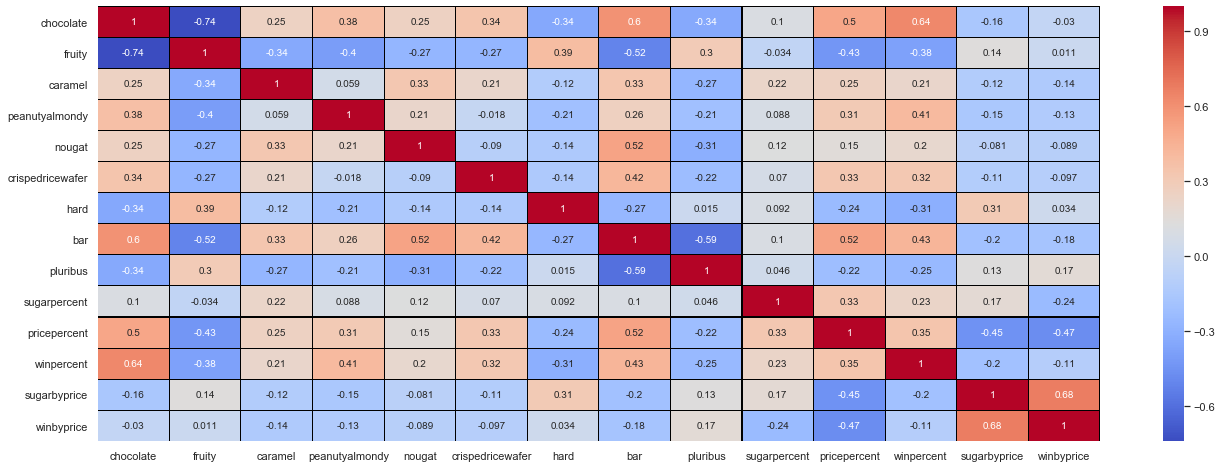

In [85]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm', linecolor='black', linewidths=.1)

In [102]:
def cor_ranking(X):
    import itertools
    lis = [[i,j,X.corr().abs().loc[i,j]] for i,j in list(itertools.combinations(X.corr().abs(), 2))]
    ranking = pd.DataFrame(lis, columns=['Feature_1', 'Feature_1', 'corr'])
    return ranking.sort_values(by='corr',ascending=False).reset_index(drop=True)
    
cor_ranking(df).head()

,Feature_1,Feature_1,corr
0,chocolate,fruity,0.74
1,sugarbyprice,winbyprice,0.68
2,chocolate,winpercent,0.64
3,chocolate,bar,0.60
4,bar,pluribus,0.59


In [110]:
winners = df[df.winpercent>df.winpercent.quantile(.6)]

,support,itemsets
1,0.32,(peanutyalmondy)
4,0.32,"(peanutyalmondy, chocolate)"
3,0.44,(pluribus)
2,0.47,(bar)
5,0.47,"(chocolate, bar)"
0,0.79,(chocolate)


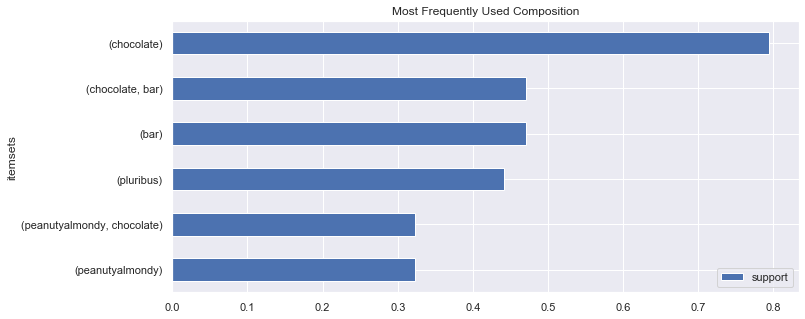

In [146]:
from mlxtend.frequent_patterns import apriori
winners_df = winners[df.columns[1:-5]]
association = apriori(winners_df, min_support=0.3, use_colnames=True).sort_values(by='support')

association.plot(kind='barh',x='itemsets',y='support',
                 title=f'Most Frequently Used Composition',
                 sort_columns=True,figsize = (10,5),legend=True)
association

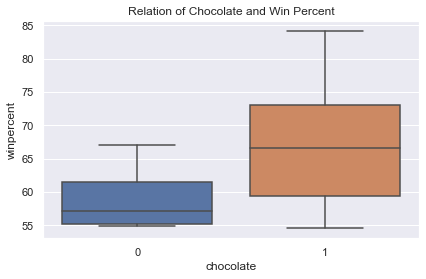

In [145]:
sns.boxplot(x="chocolate", y="winpercent", data=winners).set_title('Relation of Chocolate and Win Percent');

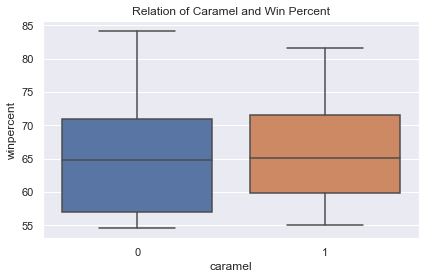

In [147]:
sns.boxplot(x="caramel", y="winpercent", data=winners).set_title('Relation of Caramel and Win Percent');

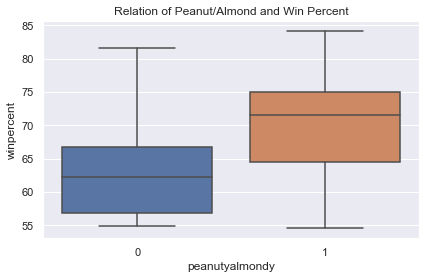

In [148]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=winners).set_title('Relation of Peanut/Almond and Win Percent');

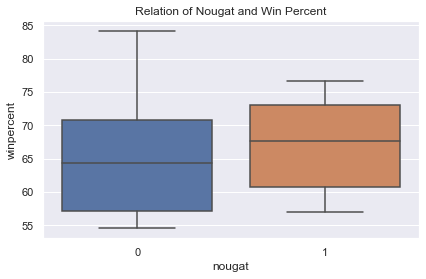

In [149]:
sns.boxplot(x="nougat", y="winpercent", data=winners).set_title('Relation of Nougat and Win Percent');

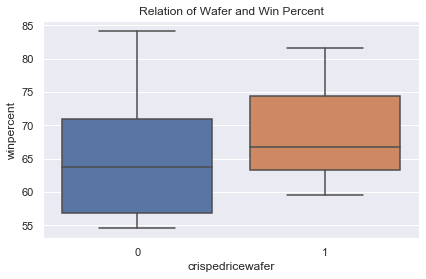

In [150]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=winners).set_title('Relation of Wafer and Win Percent');

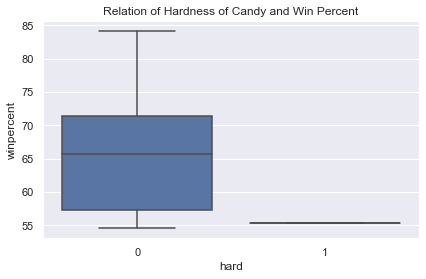

In [151]:
sns.boxplot(x="hard", y="winpercent", data=winners).set_title('Relation of Hardness of Candy and Win Percent');

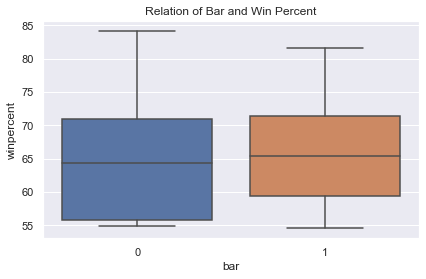

In [152]:
sns.boxplot(x="bar", y="winpercent", data=winners).set_title('Relation of Bar and Win Percent');

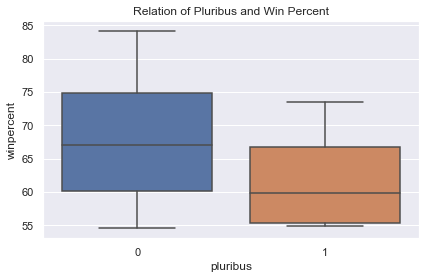

In [153]:
sns.boxplot(x="pluribus", y="winpercent", data=winners).set_title('Relation of Pluribus and Win Percent');

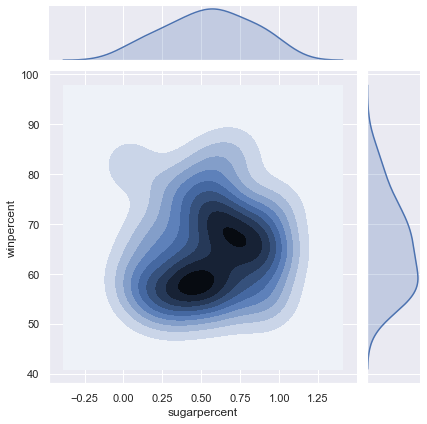

In [162]:
sns.jointplot(x="sugarpercent", y="winpercent", data=winners,kind="kde")

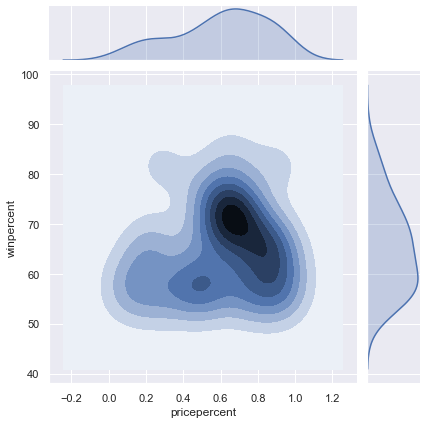

In [164]:
sns.jointplot(x="pricepercent", y="winpercent", data=winners,kind="kde")

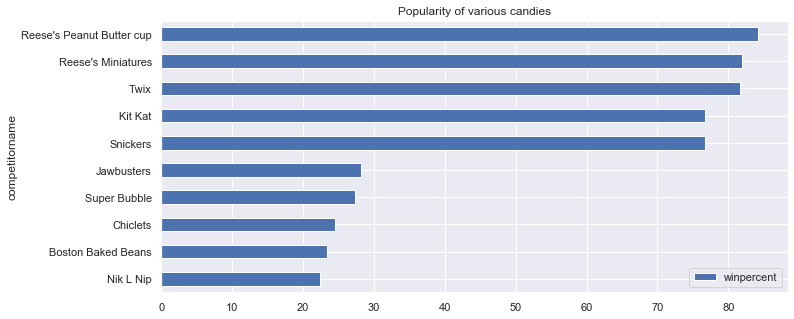

In [167]:
# Most Popular and Least Popular Candies 
popularity = df[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([popularity.head(5),popularity.tail(5)],axis=0).plot(x='competitorname',
                                                               y='winpercent',kind='barh',
                                                               title='Popularity of various candies',
                                                               sort_columns=True,figsize = (10,5),legend=True)

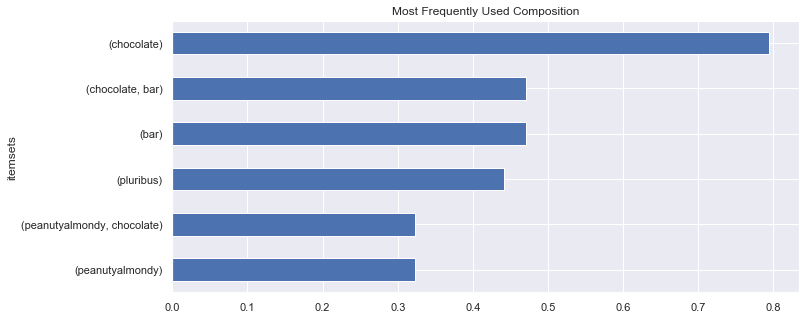

In [168]:
# Identifying the Components that make a Good Candy
association.plot(kind='barh',x='itemsets',y='support',
                 title=f'Most Frequently Used Composition',
                 sort_columns=True,figsize = (10,5),legend=False)

In [187]:
feature_col = df.columns[(df.columns != 'winpercent') & (df.columns != 'competitorname')]
X = df[feature_col]
y = df['winpercent']

In [188]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

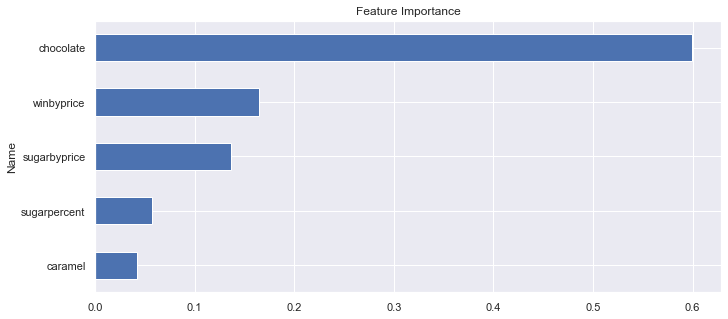

In [192]:
imp = pd.DataFrame.from_dict({'Name':feature_col,'Importance':reg.feature_importances_})
imp_plt = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)

imp_plt[imp_plt.Importance>0].plot(kind='barh',x='Name',y='Importance',
                                   title='Feature Importance',sort_columns=True,
                                   figsize = (10,5),legend=False)